# Data Import and processing
The dataset that I chose has data on movie ticket pricing. The goal of my project is to create a clustering model that will cluster the tickets based on a few factors for classifying new tickets.

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
ticketsIn = pd.read_csv('cinemaTicket_Ref.csv')
ticketsIn.dropna(inplace = True)
ticketsIn.drop('date', axis=1, inplace=True)
ticketsIn['ticket_price'] = ticketsIn['ticket_price'] / 10000
print(ticketsIn.dtypes)
print(ticketsIn.head())

film_code         int64
cinema_code       int64
total_sales       int64
tickets_sold      int64
tickets_out       int64
show_time         int64
occu_perc       float64
ticket_price    float64
ticket_use        int64
capacity        float64
month             int64
quarter           int64
day               int64
dtype: object
   film_code  cinema_code  total_sales  tickets_sold  tickets_out  show_time   
0       1492          304      3900000            26            0          4  \
1       1492          352      3360000            42            0          5   
2       1492          489      2560000            32            0          4   
3       1492          429      1200000            12            0          1   
4       1492          524      1200000            15            0          3   

   occu_perc  ticket_price  ticket_use    capacity  month  quarter  day  
0       4.26          15.0          26  610.328638      5        2    5  
1       8.08           8.0          42  519.8

# Initial Data Exploration
Im looking at the distrobutions of the afew of the data columns so that I can see if there are any outliers that might skew my dataset or if there is anything that i need to make adjustments to.
This step will also include any preprossesing of the data.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


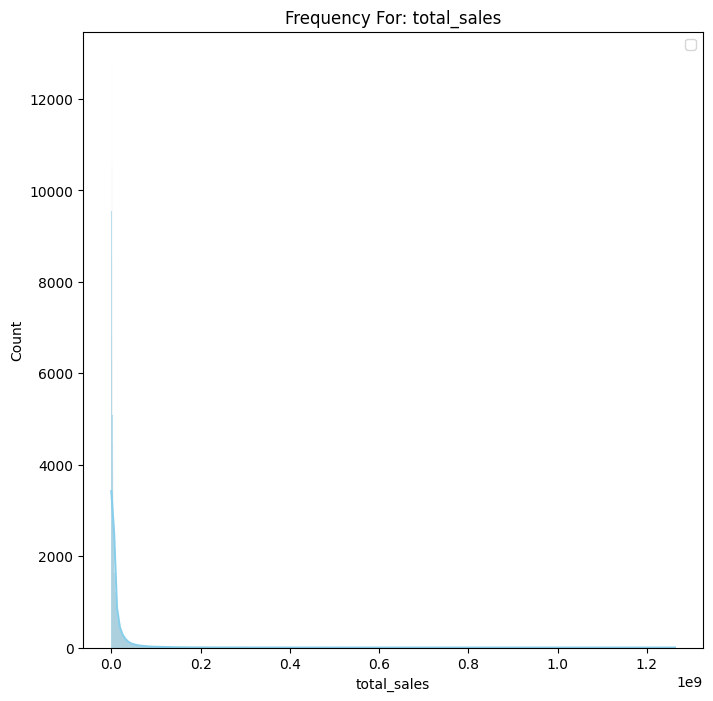

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


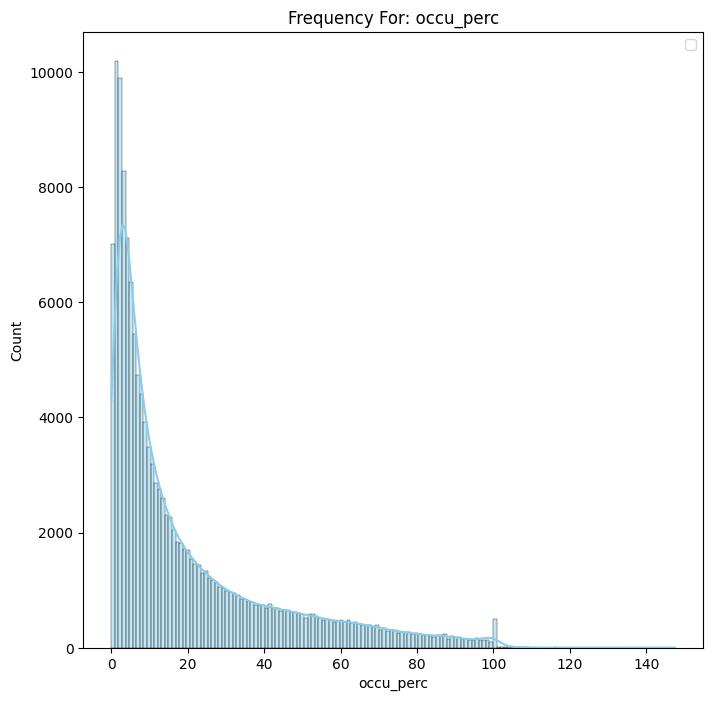

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


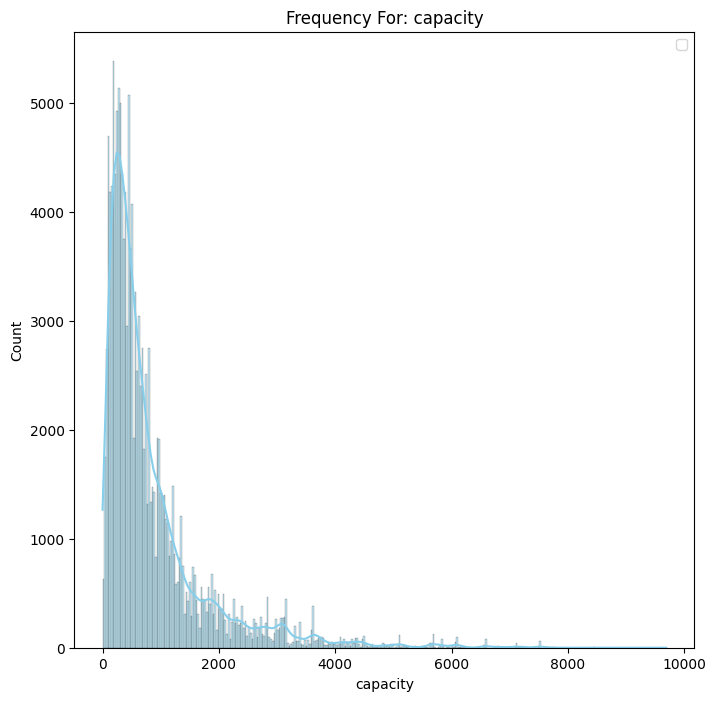

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


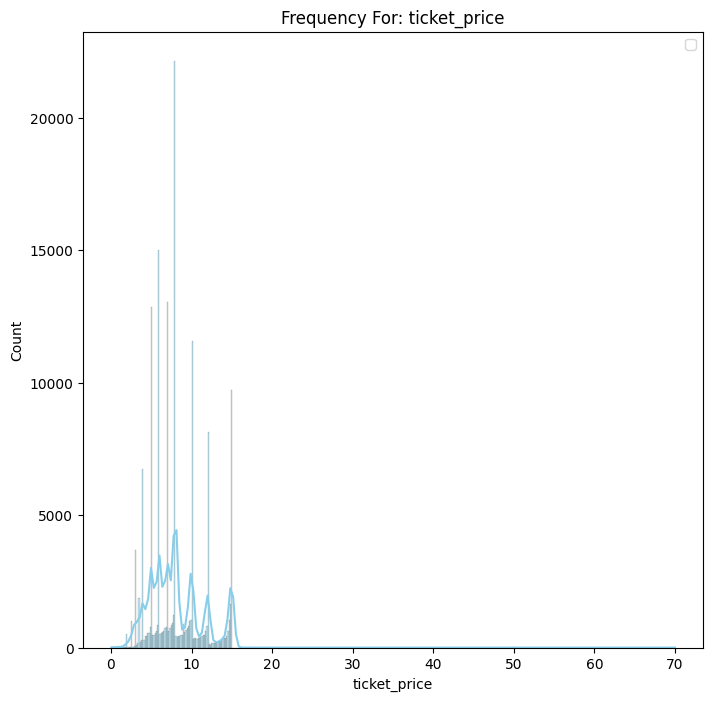

<Figure size 640x480 with 0 Axes>

In [27]:
datCols = ['total_sales', 'occu_perc', 'capacity', 'ticket_price']

for cols in datCols:
    plt.figure(figsize = (8, 8))
    sns.histplot(ticketsIn[cols], kde = True, color = 'skyblue')
    plt.xlabel(cols)
    plt.title("Frequency For: " + cols)
    plt.legend()
    plt.show()

plt.tight_layout()

# Data Modeling
This is where I am building the model itself and doing testing

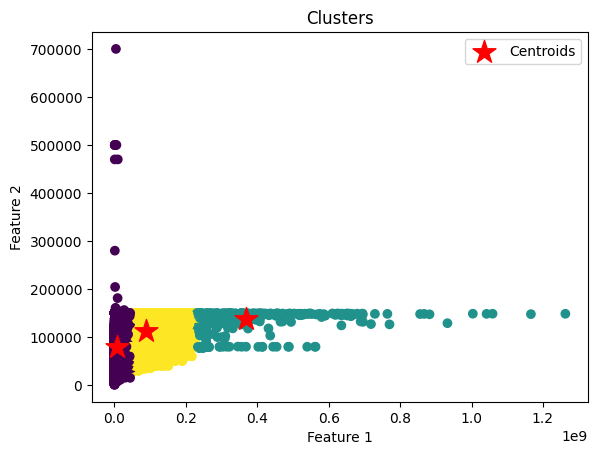

In [23]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 3, random_state = 0, n_init = 'auto').fit(ticketsIn)


plt.scatter(ticketsIn.iloc[:, 2], ticketsIn.iloc[:, 7], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:, 7], s=300, c='red', marker='*', label='Centroids')
plt.title('Clusters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

# Model Visualization
This section contains some visualizations for the model to further analyize it and its quality.